#### Step 1: Import the required libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import metrics

from sklearn.naive_bayes import GaussianNB


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


#### Step 2: Load the dataset

In [15]:
df = pd.read_csv("Disease_Symptoms.csv")

#### Step 3: Exploratory Data Analysis and data Preprocessing

In [16]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [17]:
df.shape

(4920, 133)

In [18]:
df.size

654360

In [19]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [21]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

#### Step 4: Divide the datasets into input and output

In [22]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [23]:
df.shape

(4920, 133)

In [24]:
# Last column are consider as input
X.shape

(4920, 132)

In [25]:
# Only last column is target
y.shape

(4920,)

#### Step 5: Divide the datasets into training and testing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4920, 133)
(3444, 132)
(1476, 132)
(3444,)
(1476,)


#### Step 6:  Suppose vector machine

###### Build and train the models using SVM

In [32]:
svmodel1 = svm.SVC(kernel='linear')
svmodel2 = svm.SVC(kernel='poly')
svmodel3 = svm.SVC(kernel='rbf')

In [33]:
svmodel1.fit(X_train,y_train)
svmodel2.fit(X_train,y_train)
svmodel3.fit(X_train,y_train)

SVC()

##### Do the prediction of SVM models

In [34]:
y_pred1 = svmodel1.predict(X_test)
y_pred2 = svmodel2.predict(X_test)
y_pred3 = svmodel3.predict(X_test)

##### Evalute the SVM models

In [35]:
print("Model 1 accuracy: ",metrics.accuracy_score(y_pred1, y_test))
print("Model 2 accuracy: ",metrics.accuracy_score(y_pred2, y_test))
print("Model 3 accuracy: ",metrics.accuracy_score(y_pred3, y_test))

Model 1 accuracy:  1.0
Model 2 accuracy:  1.0
Model 3 accuracy:  1.0


#### Step 7: Naive Bayes

In [36]:
nbmodel = GaussianNB()

In [37]:
nbmodel.fit(X_train, y_train)

GaussianNB()

In [38]:
nbmodel.score(X_test, y_test)

1.0

In [41]:
y_pred4 = nbmodel.predict(X_test)

In [43]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred4))

Accuracy Score on test data:  1.0


#### Step 8: Logistic Regression

#####  Build and train the model using Logistic Regression

In [39]:
lrmodel = LogisticRegression()

In [40]:
lrmodel.fit(X_train, y_train)

LogisticRegression()

#####  Do the prediction of Logistic Regression model

In [44]:
y_pred5 = lrmodel.predict(X_test)

In [45]:
y_pred5

array(['Psoriasis', 'Common Cold', 'Dimorphic hemmorhoids(piles)', ...,
       'Malaria', 'Arthritis', 'Gastroenteritis'], dtype=object)

In [46]:
y_test

array(['Psoriasis', 'Common Cold', 'Dimorphic hemmorhoids(piles)', ...,
       'Malaria', 'Arthritis', 'Gastroenteritis'], dtype=object)

In [47]:
lrmodel.score(X_test,y_test)

1.0

In [48]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred5))

Accuracy Score on test data:  1.0


#### Step 9: Decision tree

##### Build and train the model using Logistic Regression

In [49]:
dtmodel = DecisionTreeClassifier()

In [50]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

##### Do the prediction of Decision tree model

In [51]:
y_pred6 = dtmodel.predict(X_test)

In [52]:
y_pred6

array(['Psoriasis', 'Common Cold', 'Dimorphic hemmorhoids(piles)', ...,
       'Malaria', 'Arthritis', 'Gastroenteritis'], dtype=object)

In [53]:
y_test

array(['Psoriasis', 'Common Cold', 'Dimorphic hemmorhoids(piles)', ...,
       'Malaria', 'Arthritis', 'Gastroenteritis'], dtype=object)

##### Evalute the decision tree model

In [54]:
print('Accuracy Score on test data: ',accuracy_score(y_true=y_test, y_pred=y_pred6))

Accuracy Score on test data:  1.0


##### Plot the decision tree

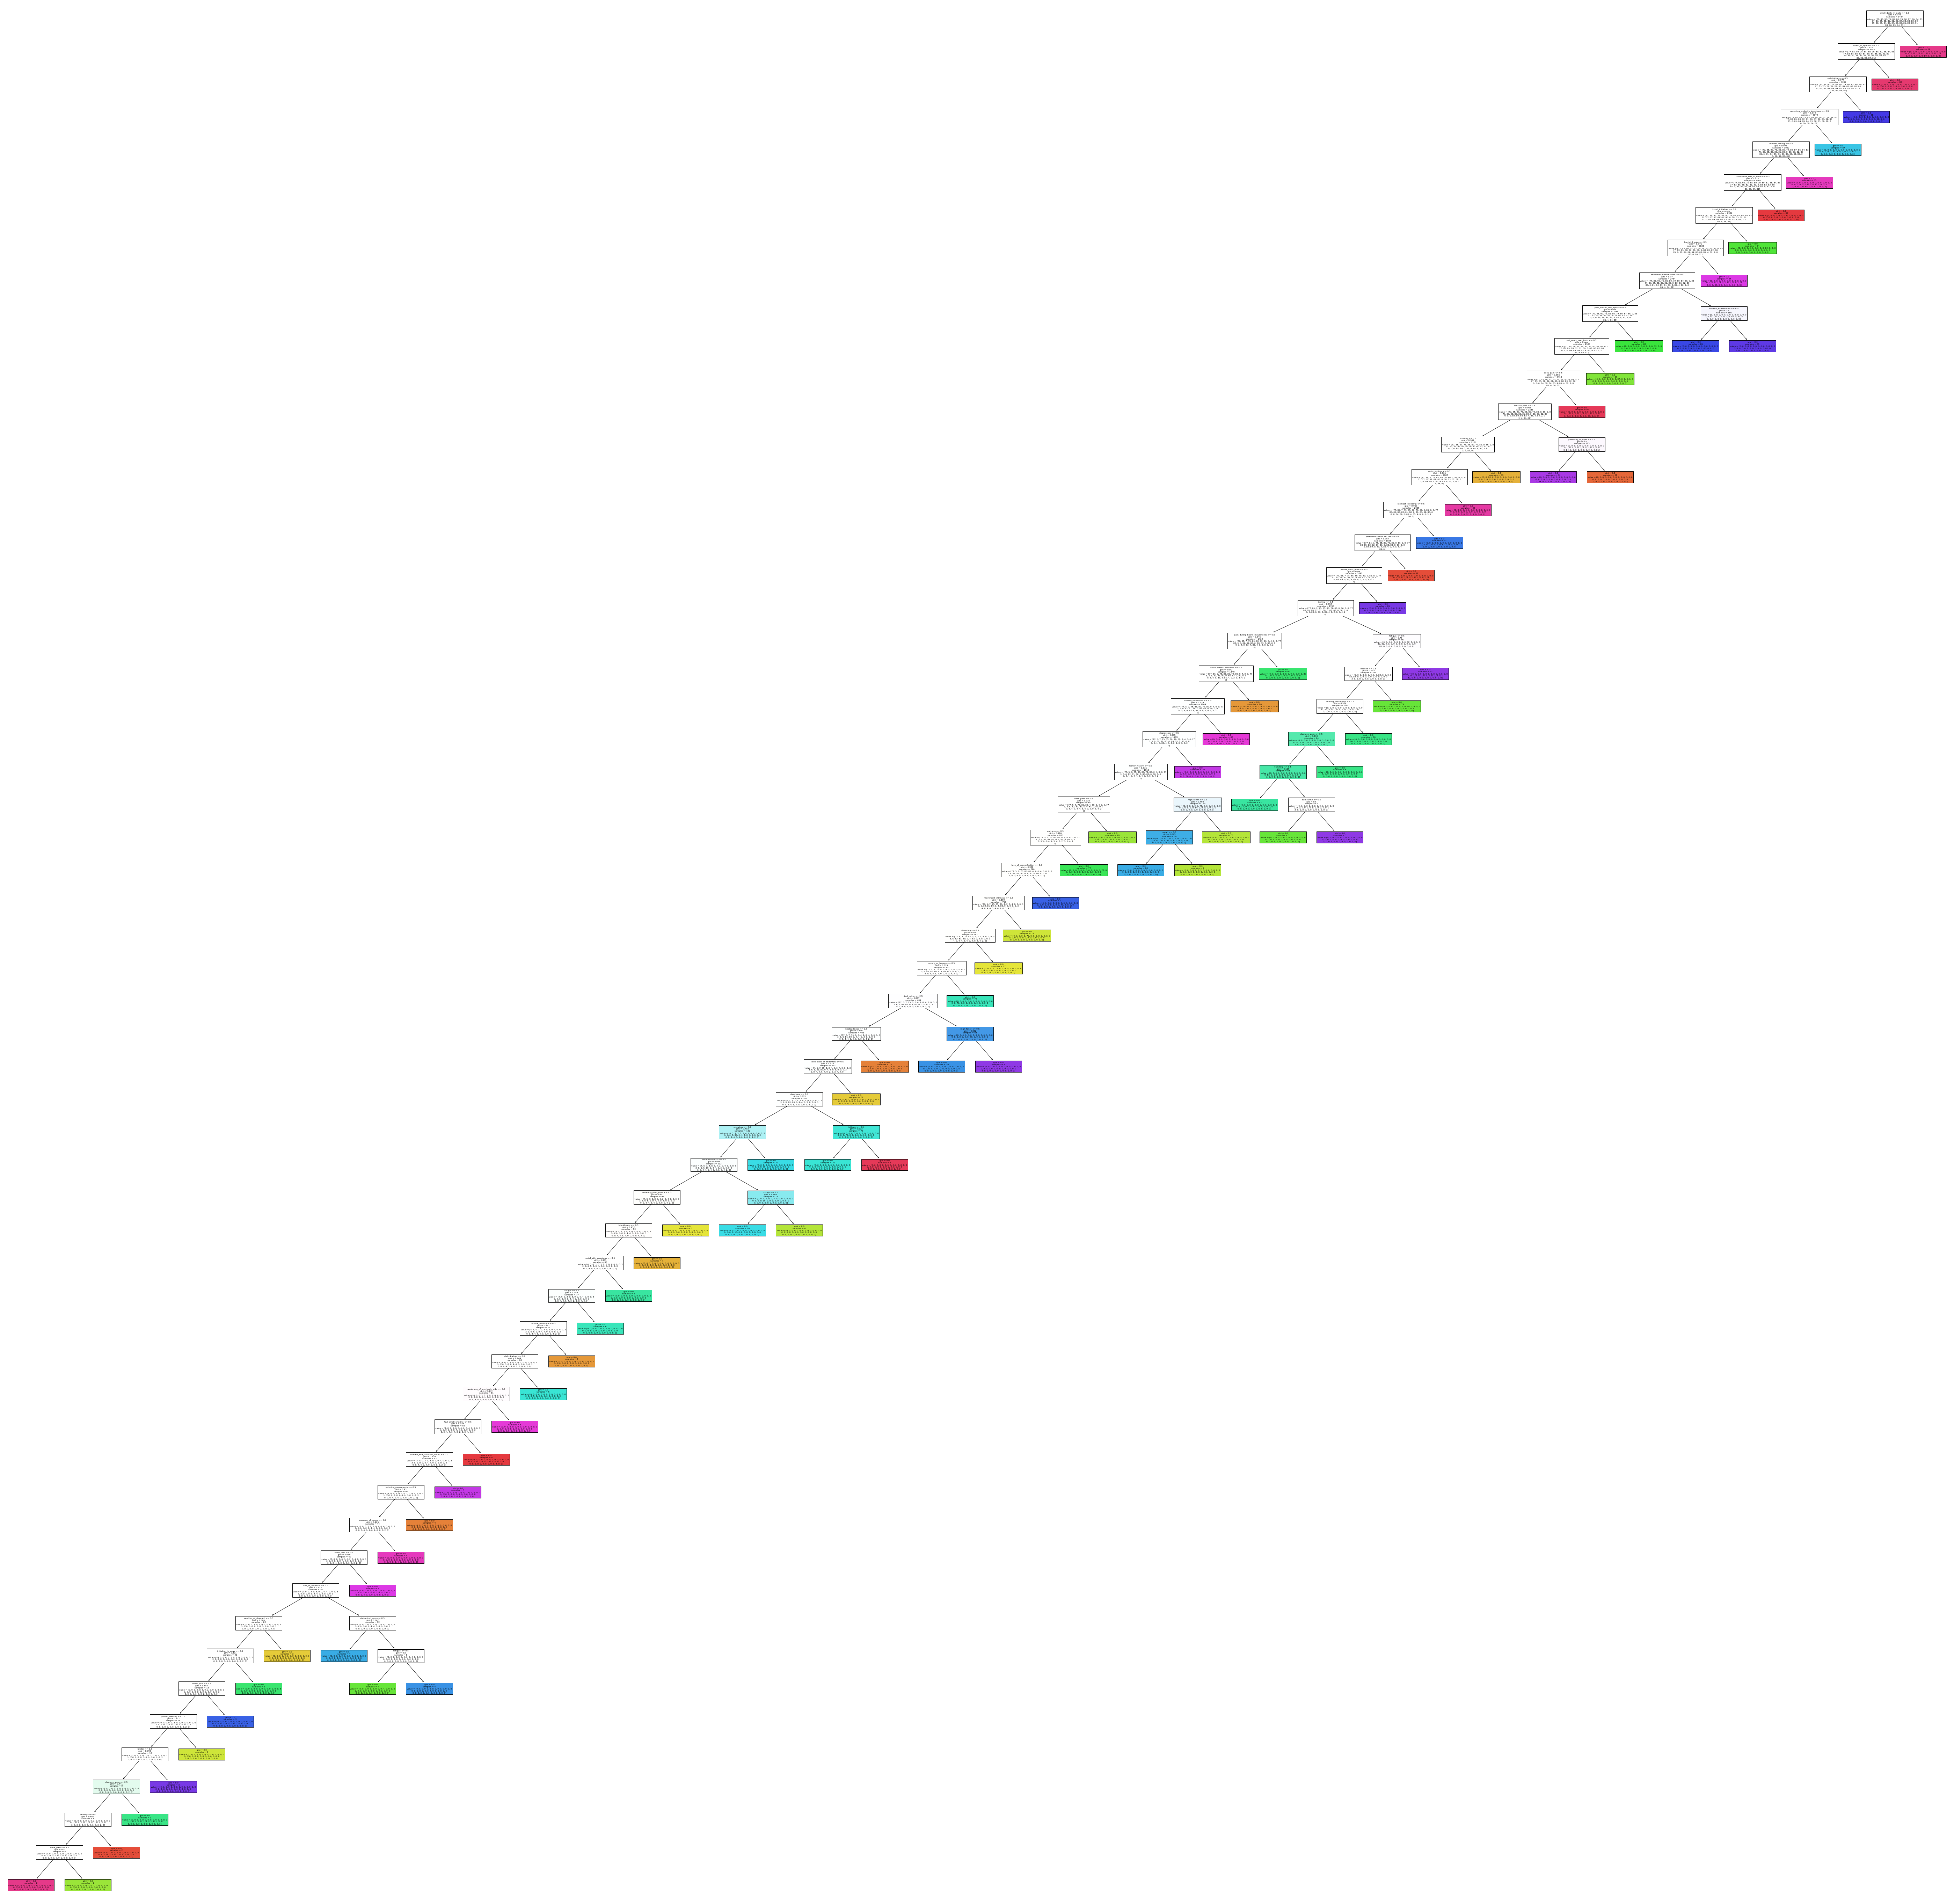

In [55]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(100,100))
# _ underscore it is a variable

_ = tree.plot_tree(
     dtmodel,
    feature_names=df.columns,
    filled =True
)

##### Manually prediction of decision tree model

In [56]:
# prediction for first row in dataset
dtmodel.predict([[1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
]])

array(['Fungal infection'], dtype=object)

In [57]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
